## Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install yfinance
from pandas_datareader import data
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import yfinance
import os 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data')

In [ ]:
!pwd

/content/drive/MyDrive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data


In [ ]:
import nltk
from nltk import word_tokenize
import pandas as pd
import datetime
import json

In [ ]:
%%time
import datetime
    
df = pd.read_excel('AAL_data4_1.xlsx',index_col=0)
print(len(df))

818
CPU times: user 125 ms, sys: 0 ns, total: 125 ms
Wall time: 126 ms


## NLP - flair

In [ ]:
df = df[df['article'].notnull()]
df = df[df['article'] != 'Not Applicable']
df = df.sort_values(by=['date']).reset_index(drop=True)
df['article'] = df['article'].apply(lambda x: str(x))

In [ ]:
data = []
for i in df.index:   
    date = df['date'][i]
    title = df['title'][i]
    abstract = df['abstract'][i]
    author = df['author'][i]
    link = df['link'][i]
    genre = df['genre'][i]
    article = df['article'][i]

    #print(abstract)
    more = [date, title, abstract, author, link, genre, article]
    data.append(more)
def get_nrc_data():
    nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict
emotion_dict = get_nrc_data()

def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

def comparative_emotion_analyzer(text_tuples,object_name="News"):
    
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)
    
    output = df    
    #print(len(text_tuples))
    pos = 0
    for text_tuple in text_tuples:
        text = text_tuple[6]
        #print(type(text))
        result = emotion_analyzer(text)
        #print(text_tuple)
        
        df.loc[pos] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
        
        pos += 1

    return output
#And test it        
all_sentiment = comparative_emotion_analyzer(data)

all_sentiment["All_Pos"]=(all_sentiment['Trust']+all_sentiment['Positive']+ all_sentiment['Joy']+ all_sentiment['Anticipation'])
all_sentiment["All_Neg"]=(all_sentiment['Fear']+all_sentiment['Negative']+ all_sentiment['Disgust']+ all_sentiment['Sadness'])
all_sentiment['Net']=all_sentiment["All_Pos"]-all_sentiment["All_Neg"]

In [ ]:
all_sentiment['Net']

News
0      0.010417
1     -0.010336
2      0.007634
3      0.074303
4      0.018232
         ...   
771    0.048352
772   -0.013629
773    0.018579
774    0.063126
775    0.039427
Name: Net, Length: 776, dtype: float64

In [ ]:
result_ls = np.array(all_sentiment['Net'])

In [ ]:
os.chdir('/content/drive/My Drive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data')
if os.getcwd() == '/content/drive/My Drive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data':
  np.savetxt(f'result_ls_NYT.txt',result_ls)
else:
  print('wrong folder')
# result_ls = np.loadtxt(f'result_ls_{year}.txt',delimiter=',')

## yfinace

In [ ]:
df['score'] = result_ls
df.head(1)

if os.getcwd() == '/content/drive/My Drive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data':
  df.to_csv(f'df_NYT.csv',index=True, header=True)
else:
  print('wrong folder')

## Result

In [ ]:
# from pandas_datareader import data
# import pandas_datareader as pdr
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import datetime
# import yfinance
# import os 
# os.chdir('/content/drive/My Drive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data')
# df = pd.read_csv('df_NYT.csv')

# def ceil_score(x):
#   if x > 0:
#     return 1
#   else:
#     return -1
# df['ceil_score'] = df['score'].apply(ceil_score)

# tickers = ['AAL']

# start_date = datetime.datetime(2010,1,1)
# end_date = datetime.datetime(2021,6,30)

# price = yfinance.download(tickers, start_date, end_date)['Close']
# y_test = price.pct_change()
# pred_lead_1 = df.groupby('date').score.mean()
# y_pred = pred_lead_1.shift(1)
# y_test = pd.DataFrame(y_test)
# y_pred = pd.DataFrame(y_pred)
# y_test = y_test.rename(columns={'Close': 'actual'})
# y_pred = y_pred.rename(columns={'score': 'pred','ceil_score': 'pred'})
# output = pd.merge(y_test,y_pred,how='left',left_index=True,right_index=True)
# output.dropna(how='any',inplace=True)
# print('pred accuracy:',(output['actual'] * output['pred'] > 0).mean())
# print('down pct',(output['actual']<0).mean())

[*********************100%***********************]  1 of 1 completed
pred accuracy: 0.4904679376083189
down pct 0.4904679376083189


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import warnings # to ignore warning
warnings.filterwarnings('ignore')
!pip install yfinance
from pandas_datareader import data
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import yfinance
import os 
os.chdir('/content/drive/My Drive/Morgan Stanly Challenge/redo Morgan Stanley Data Challenge/result_data')

df = pd.read_csv('df_NYT.csv')
len(df)
# print(df['genre'].unique())
# df = df[df['genre'].isin(['Business','Global Business','Travel','Today’s Paper','Opinion','Your Money','Economy','Americas', 'World',
#                          'Sunday Review','International Business','Briefing','Blogs'])]
# sum([1 for i in df['title'].str.lower().values if 'american airlines' in i ])

Mounted at /content/drive


776

In [ ]:
df = df.loc[[k for k,v in enumerate(df['title'].str.lower()) if 'american airlines' in v]].reset_index(drop=True)

In [ ]:
def ceil_score(x):
  if x > 0:
    return 1
  else:
    return -1
df['ceil_score'] = df['score'].apply(ceil_score)
tickers = ['AAL']
start_date = datetime.datetime(2010,1,1)
end_date = datetime.datetime(2021,6,30)

price = yfinance.download(tickers, start_date, end_date)[['Open','Close']]
price['pct_change'] = (price['Close'] - price['Open'])/price['Open']


pred_lead_1 = df.groupby('date').score.mean()
y_pred = pred_lead_1.shift(-1)
y_test = pd.DataFrame(price['pct_change'])
y_pred = pd.DataFrame(y_pred)
y_test = y_test.rename(columns={'pct_change': 'actual'})
y_pred = y_pred.rename(columns={'score': 'pred','ceil_score': 'pred'})
output = pd.merge(y_test,y_pred,how='left',left_index=True,right_index=True)
output.dropna(how='any',inplace=True)
print('pred accuracy:',round((output['actual'] * output['pred'] > 0).mean(),6))
print('down pct',(output['actual']<0).mean())

[*********************100%***********************]  1 of 1 completed
pred accuracy: 0.551724
down pct 0.5172413793103449


In [ ]:
price['next_open'] = price['Open'].shift(-1)
output = pd.merge(output,pd.DataFrame(price[['Open','Close','next_open']]),how='left',left_index=True,right_index=True)
output['price_change'] = output.Close - output.Open
output.dropna(how='any',inplace=True)
output

,actual,pred,Open,Close,next_open,price_change
Date,,,,,,
2010-01-19,0.025455,4.035874e-02,5.500000,5.640000,5.650000,0.140000
2010-02-09,0.047154,4.559748e-02,6.150000,6.440000,6.390000,0.290000
2010-03-10,0.017949,9.469697e-03,7.800000,7.940000,7.920000,0.140000
2010-04-21,-0.051893,4.761905e-02,7.130000,6.760000,6.660000,-0.370000
2010-04-27,-0.052395,6.167401e-02,6.680000,6.330000,6.640000,-0.350000
2010-06-10,0.025756,7.647059e-02,8.930000,9.160000,9.010000,0.230000
2010-06-16,0.026214,1.821862e-02,10.300000,10.570000,10.620000,0.270000
2010-08-26,-0.030303,7.048458e-02,8.910000,8.640000,8.830000,-0.270000
2010-12-21,0.031373,7.344633e-02,10.200000,10.520000,10.540000,0.320001


In [ ]:
price

,Open,Close,pct_change,next_open
Date,,,,
2010-01-04,4.840000,4.770000,-0.014463,4.790000
2010-01-05,4.790000,5.310000,0.108559,5.190000
2010-01-06,5.190000,5.090000,-0.019268,5.060000
2010-01-07,5.060000,5.240000,0.035573,5.270000
2010-01-08,5.270000,5.140000,-0.024668,5.130000
...,...,...,...,...
2021-06-23,22.170000,22.200001,0.001353,22.209999
2021-06-24,22.209999,22.350000,0.006304,22.330000
2021-06-25,22.330000,22.219999,-0.004926,22.090000


In [ ]:
# pred < 0, sell at open, buy back at next open, if next day pred still < 0, put up to next day 
price['Close'][-1] - price['Close'][1]
price['Close'][1]

5.309999942779541

In [ ]:
c = price['Close'][1]
avoid = 0
for ind in output.index:
  if output.loc[ind,'pred'] < 0:
    avoid += output.loc[ind,'Open'] - output.loc[ind,'next_open']
avoid

1.5600004196166992

In [ ]:

avoid = {}
for ind in output.index:
  if output.loc[ind,'pred'] < 0:
    avoid[ind] = output.loc[ind,'Open'] - output.loc[ind,'next_open']
  else:
    avoid[ind] = 0

output['avoid'] = pd.Series(avoid)
output
price = yfinance.download(tickers, start_date, end_date)[['Open','Close']]
price['pct_change'] = (price['Close'] - price['Open'])/price['Open']
price.dropna(inplace=True)
price['avoid'] = output['avoid']
price['avoid'] = np.cumsum(price['avoid'].fillna(0))
price['value'] = price['avoid'] + price['Open']
price

[*********************100%***********************]  1 of 1 completed


,Open,Close,pct_change,avoid,value
Date,,,,,
2010-01-04,4.840000,4.770000,-0.014463,0.00,4.840000
2010-01-05,4.790000,5.310000,0.108559,0.00,4.790000
2010-01-06,5.190000,5.090000,-0.019268,0.00,5.190000
2010-01-07,5.060000,5.240000,0.035573,0.00,5.060000
2010-01-08,5.270000,5.140000,-0.024668,0.00,5.270000
...,...,...,...,...,...
2021-06-23,22.170000,22.200001,0.001353,1.56,23.730000
2021-06-24,22.209999,22.350000,0.006304,1.56,23.770000
2021-06-25,22.330000,22.219999,-0.004926,1.56,23.890000


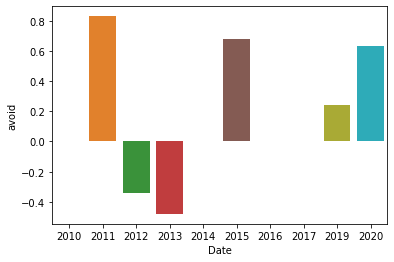

In [ ]:
import seaborn as sns
sns.barplot(data = output, x = output.index.year, y = 'avoid', estimator=np.sum, ci=None)

In [ ]:
pd.Series([-1 if price[price.index.year == y].iloc[-1,0] - price[price.index.year == y].iloc[0,0] < 0 else 1 for y in range(2010,2022)],index=range(2010,2022))

2010    1
2011   -1
2012    1
2013    1
2014    1
2015   -1
2016    1
2017    1
2018   -1
2019   -1
2020   -1
2021    1
dtype: int64

In [ ]:
a = round(100*(price.iloc[-1,0]-price.iloc[0,-1])/price.iloc[0,-1],6)
b = round(100*(price.iloc[-1,-1]-price.iloc[0,-1])/price.iloc[0,-1],6)
print(f'Buy and Hold return: {a}%')
print(f'NLP return: {b}%')
print(f'NLP improved by: {round(100*(b-a)/a,6)}%')

Buy and Hold return: 340.495848%
NLP return: 372.72726%
NLP improved by: 9.466022%
